In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#take splittig function
from sklearn.model_selection import train_test_split
#import ML models
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
#import metrics for evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

In [2]:
df1 = pd.read_csv('../liar_dataset/liar BoW1.csv', index_col='id')
df2 = pd.read_csv('../liar_dataset/liar BoW2.csv', index_col='id')
dataset = pd.concat([df1, df2])

Y is output variable
x is the input variables

In [3]:
Y = dataset['label']
x = dataset.drop(columns=['label'])

In [4]:
Y

id
0        0
1        1
2        1
3        0
4        1
        ..
12804    0
12805    0
12806    0
12807    1
12808    1
Name: label, Length: 12809, dtype: int64

In [5]:
x

,abandon,abbas,abele,abide,ability,abject,able,aboard,abolish,abort,...,yet,york,youd,young,youth,youve,zero,zip,zombie,zone
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Splitting the dataset into train and test data (80% train, 20% test)

In [6]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state = 10)

In [7]:
x_train.shape, x_test.shape, Y_train.shape, Y_test.shape

((10247, 4183), (2562, 4183), (10247,), (2562,))

Light GBM Classifier

In [10]:
lgbm = LGBMClassifier(n_estimators = 200, max_depth = 3, learning_rate = 0.1, n_jobs = -1, verbose = -1, random_state=10)
#learning rate is the hillclimbing step in minimizing error function
#verbose = -1 disables verbose logging of all trees states

In [11]:
#training the model
lgbm.fit(x_train, Y_train)

LGBMClassifier(max_depth=3, n_estimators=200, n_jobs=-1, random_state=10,
               verbose=-1)

In [12]:
Y_predict_test = lgbm.predict(x_test)

Computing accuracy, precision, and recall

In [13]:
accuracy_lgbm = accuracy_score(Y_test, Y_predict_test)
print('Accuracy for LGBM test is: ', accuracy_lgbm)
precision_lgbm = precision_score(Y_test, Y_predict_test)
recall_lgbm = recall_score(Y_test, Y_predict_test)
print('Precision for LGBM test is: ', precision_lgbm)
print('Recall for LGBM test is: ', recall_lgbm)

Accuracy for LGBM test is:  0.5698672911787666
Precision for LGBM test is:  0.5723684210526315
Recall for LGBM test is:  0.22345890410958905


Confusion matrix

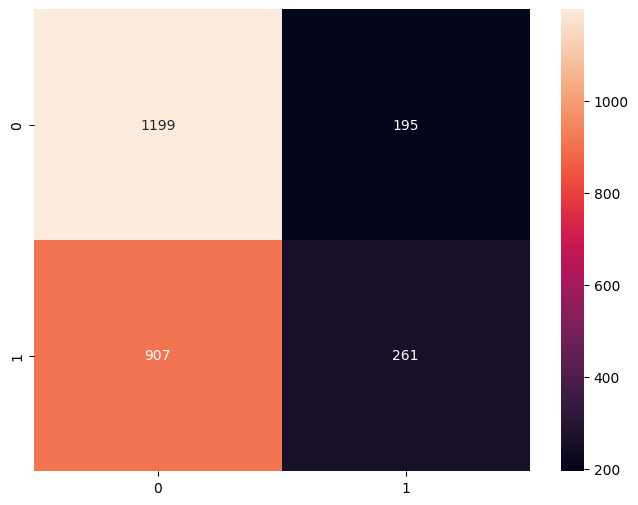

In [14]:
cm_lgbm = confusion_matrix(Y_test, Y_predict_test)
#visualise confusion matrix
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(cm_lgbm, annot = True, fmt = 'd') #with annotations formatted as decimal
plt.show()

In [16]:
Y_predict_train = lgbm.predict(x_train)\

#assess on train data
accuracy_test = accuracy_score(Y_train, Y_predict_train)
precision_test = precision_score(Y_train, Y_predict_train)
recall_test = recall_score(Y_train, Y_predict_train)
print('Accuracy train is :', accuracy_test)
print('Precision train is :', precision_test)
print('Recall train is :', recall_test)

Accuracy train is : 0.6312091343807944
Precision train is : 0.690977849810913
Recall train is : 0.28510922871154704
